# **ANALISIS EXPLORATORIO DE DATOS MILEI VS CFK  EN "X" (TWITTER)**

¿Es la red X un medio de comunicacion valorado entre la política y la gente?

La sociedad se encuentra en una evulucion permanente. Las nuevas tecnologías y las redes sociales hacen que esos cambios sean cada vez más rápidos. La política actual necesita hablar directa y rápidamente con susu seguidores y militantes para sembrar ideas en la población que permitan desarrollar sus ideologías. Para el análisis de dicha comunicación nos centraremos en dos personas muy opuestas entre sí por su ideología y progrmas políticos pero que tienen en común el dialogo directo y vertical con su electorado y militancia como son Javier Milei y Cristina Fernandez de Kirchner.  
Se pretende concluir si la red "X" es importante para un politico que pretenda construir poder basado en el dialogo con sus afines.-

In [ ]:
#Instalamos librería
!pip install ntscraper
!pip install wordcloud==1.8.1
!pip install nltk

#"Importamos Librerías"
from ntscraper import Nitter
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords') # Descargamos stopwords corpus
from nltk.corpus import stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp310-cp310-linux_x86_64.whl size=402037 sha256=b6411c3d6f8c2f95b998bdc04ad366949a16baa7e6296e44f3c8c27be856e485
  Stored in directory: /root/.cache/pip/wheels/6b/b1/75/024072f28a2b9d6c4f80b35ebfd6ced7fd9fc58e9f1b933b9f
Successfully built wordcloud
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.3
    Uninstalling wordcloud-1.9.3:
      Successfully uninstalled wordcloud-1.9.3


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **ANALISIS BASICO DE PERFILES**

In [ ]:
#instancio la conexión
scraper = Nitter(0)

Testing instances: 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


In [ ]:
prof_JM = scraper.get_profile_info("JMilei")

prof_JM

INFO:root:No instance specified, using random instance https://nitter.privacydev.net


{'image': 'https://pbs.twimg.com/profile_images/1553931112262549505/XTcdwp0b_400x400.jpg',
 'name': 'Javier Milei',
 'username': '@JMilei',
 'id': '4020276615',
 'bio': 'Economista',
 'location': 'Buenos Aires, Argentina',
 'website': '',
 'joined': '11:47 PM - 22 Oct 2015',
 'stats': {'tweets': 254940,
  'following': 1178,
  'followers': 3415859,
  'likes': 498021,
  'media': 0}}

In [ ]:
prof_CFK = scraper.get_profile_info("CFKArgentina")

prof_CFK

INFO:root:No instance specified, using random instance https://nitter.privacydev.net


{'image': 'https://pbs.twimg.com/profile_images/1112014698/foto6-3.jpg_1__400x400.jpg',
 'name': 'Cristina Kirchner',
 'username': '@CFKArgentina',
 'id': '138814032',
 'bio': 'Militante peronista. 2 veces Presidenta mandato cumplido 🇦🇷',
 'location': 'Argentina',
 'website': 'https://t.me/cfkargentinaok',
 'joined': '5:36 PM - 30 Apr 2010',
 'stats': {'tweets': 16125,
  'following': 239,
  'followers': 6147856,
  'likes': 492,
  'media': 0}}

In [ ]:
#Normalizamos datos de Json  y los concatenamos para que se muestren todas las columnas en el Data Frame
df_JM = pd.json_normalize(prof_JM)
df_CFK = pd.json_normalize(prof_CFK)

df_presidentes = pd.concat([df_JM, df_CFK])
df_presidentes

,image,name,username,id,bio,location,website,joined,stats.tweets,stats.following,stats.followers,stats.likes,stats.media
0,https://pbs.twimg.com/profile_images/155393111...,Javier Milei,@JMilei,4020276615,Economista,"Buenos Aires, Argentina",,11:47 PM - 22 Oct 2015,254940,1178,3415859,498021,0
0,https://pbs.twimg.com/profile_images/111201469...,Cristina Kirchner,@CFKArgentina,138814032,Militante peronista. 2 veces Presidenta mandat...,Argentina,https://t.me/cfkargentinaok,5:36 PM - 30 Apr 2010,16125,239,6147856,492,0


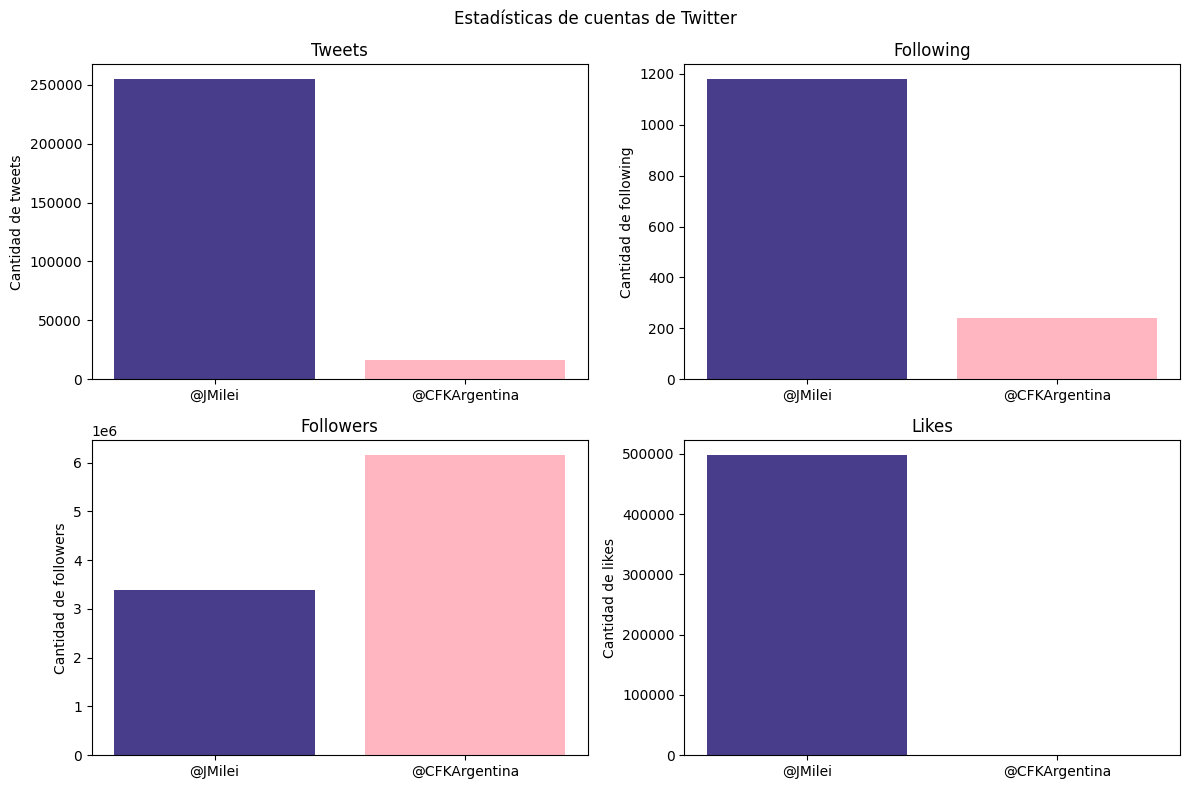

In [ ]:
# Creamos Grafico para estudiar perfiles)
names = ['@JMilei', '@CFKArgentina']
tweets = [254513,16125 ]
following = [1178, 239]
followers = [3387137,6148012 ]
likes = [497414, 492]
colors = ['darkslateblue','lightpink']# Colores para las barras

# Crear un subplot con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Estadísticas de cuentas de Twitter')

# Gráfico de tweets
axs[0, 0].bar(names, tweets, color=colors)
axs[0, 0].set_title('Tweets')
axs[0, 0].set_ylabel('Cantidad de tweets')

# Gráfico de following
axs[0, 1].bar(names, following, color=colors)
axs[0, 1].set_title('Following')
axs[0, 1].set_ylabel('Cantidad de following')

# Gráfico de followers
axs[1, 0].bar(names, followers, color=colors)
axs[1, 0].set_title('Followers')
axs[1, 0].set_ylabel('Cantidad de followers')

# Gráfico de likes
axs[1, 1].bar(names, likes, color=colors)
axs[1, 1].set_title('Likes')
axs[1, 1].set_ylabel('Cantidad de likes')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **ANALISIS DE CUENTAS**

### **@JMilei**
Creo Data Frame con los datos de la cuenta de @JMilei

In [ ]:
def get_ultimos_tweets_JM():
    scraper = Nitter(0)
    tweets = scraper.get_tweets('JMilei', mode = 'user', number= 1000)
    final_tweets = []
    for x in tweets['tweets']:
        data = [x.get('text'),
                x.get('date'),
                x.get('user').get('username'),
                x.get('is-retweet'),
                x['stats'].get('likes'),
                x['stats'].get('retweets'),
                x['stats'].get('quotes'),
                x['stats'].get('comments')]

        final_tweets.append(data)
    return pd.DataFrame(final_tweets, columns =['text','date','user','is-retweet','likes', 'retweets','quotes', 'comments'])

In [ ]:
Tweets_JM = get_ultimos_tweets_JM()
Tweets_JM.head(20)

Testing instances: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for JMilei: 20 tweets, 0 threads...
INFO:root:Current stats for JMilei: 40 tweets, 0 threads...
INFO:root:Current stats for JMilei: 60 tweets, 0 threads...
INFO:root:Current stats for JMilei: 80 tweets, 0 threads...
INFO:root:Current stats for JMilei: 100 tweets, 0 threads...
INFO:root:Current stats for JMilei: 120 tweets, 0 threads...
INFO:root:Current stats for JMilei: 140 tweets, 0 threads...
INFO:root:Current stats for JMilei: 160 tweets, 0 threads...
INFO:root:Current stats for JMilei: 180 tweets, 0 threads...
INFO:root:Current stats for JMilei: 200 tweets, 0 threads...


,text,date,user,is-retweet,likes,retweets,quotes,comments
0,Y los municipios no les parece que podrían int...,"Sep 3, 2024 · 1:38 PM UTC",@lilianafranco20,True,630,128,0,70
1,Detrás de las causas nobles se esconden los ma...,"Sep 3, 2024 · 10:06 PM UTC",@rcas1,True,530,146,0,20
2,Depósitos USD - Confianza Privados 19.1b Tota...,"Sep 3, 2024 · 9:56 PM UTC",@Hombre__Manzana,True,374,57,2,6
3,Si esta semana se aprueba la Boleta Única de P...,"Sep 3, 2024 · 9:41 PM UTC",@marceloduclos,True,1052,142,6,35
4,"🇦🇷🚨 | Mientras critica a @JMilei por ""desfinan...","Sep 3, 2024 · 9:15 PM UTC",@laderechadiario,True,1232,470,23,44
5,Aerolíneas Argentinas low cost. Quién lo hubie...,"Sep 3, 2024 · 9:48 PM UTC",@fedesturze,True,3133,500,17,126
6,🇦🇷🥹| El gobierno de Milei aumenta la asignació...,"Sep 3, 2024 · 9:20 PM UTC",@TraductorTeAma,True,2112,572,35,145
7,"Mientras tanto, los medios de comunicación mie...","Sep 3, 2024 · 8:55 PM UTC",@DiegoMac227,True,575,159,3,34
8,El Arte de la Doma Clásica. #ArchivoMilei,"Sep 3, 2024 · 9:00 PM UTC",@Milei_Serie,True,1276,277,12,60
9,"9 meses en el poder, paso la motosierra, sigue...","Sep 3, 2024 · 2:47 PM UTC",@MazzucaMacu,True,685,117,0,26


In [ ]:
Tweets_JM.shape

(180, 8)

### **Creamos las Columnas CFKArgentina (1-False) y JMilei (0-True)**
 el valor 0 indica que el origen es de la cuenta de @JMilei

In [ ]:
Tweets_JM['CFKArgentina'] = 1
Tweets_JM['JMilei'] = 0
Tweets_JM = Tweets_JM[['CFKArgentina', 'JMilei','text','date','user','is-retweet','likes', 'retweets','quotes', 'comments']]
Tweets_JM

,CFKArgentina,JMilei,text,date,user,is-retweet,likes,retweets,quotes,comments
0,1,0,"Son unos hijos de puta, genocidas, traidores a...","Sep 3, 2024 · 2:02 AM UTC",@jlespert,True,1005,251,5,65
1,1,0,Si resto del año se repite estacionalidad del ...,"Sep 2, 2024 · 9:47 PM UTC",@marcapello,True,405,84,10,17
2,1,0,Presupuesto 2025: Javier Milei evalúa ir al Co...,"Sep 2, 2024 · 11:09 PM UTC",@lilianafranco20,True,623,90,2,37
3,1,0,🚨🇦🇷 | MILEI ELIMINÓ EL CURRO DE LAS SIRAS Se ...,"Sep 2, 2024 · 10:25 PM UTC",@TommyShelby_30,True,1709,329,4,48
4,1,0,🚨 INTELECTUAL DE MILLER MEGA ULTRA TIPAZO 🚨 -...,"Sep 2, 2024 · 9:52 PM UTC",@TommyShelby_30,True,1935,331,7,48
...,...,...,...,...,...,...,...,...,...,...
844,1,0,El Gasto público pasó de usd150mil millones en...,"Aug 27, 2024 · 3:24 PM UTC",@rcas1,True,918,268,7,37
845,1,0,"Que buena noticia que José Luis Daza, un gran ...","Aug 27, 2024 · 6:32 PM UTC",@dreidel1,True,1051,133,0,16
846,1,0,LO IMPOSIBLE ES REALIDAD El día que acepté el ...,"Aug 27, 2024 · 3:37 PM UTC",@PatoBullrich,True,13057,2192,113,1316
847,1,0,Solo quería recordarles que ya no hay más piqu...,"Aug 27, 2024 · 2:54 PM UTC",@Miguel_Boggiano,True,3107,429,8,78


### **@CFKArgentina**
Creo Dta Frame con los datos de la cuenta de @CFKArgentina

In [ ]:
def get_ultimos_tweets_CFK():
    scraper = Nitter(0)
    tweets = scraper.get_tweets("CFKArgentina", mode = 'user', number= 1000)
    final_tweets = []
    for x in tweets['tweets']:
        data = [x.get('text'),
                x.get('date'),
                x.get('user').get('username'),
                x.get('is-retweet'),
                x['stats'].get('likes'),
                x['stats'].get('retweets'),
                x['stats'].get('quotes'),
                x['stats'].get('comments')]

        final_tweets.append(data)
    return pd.DataFrame(final_tweets, columns =['text','date','user','is-retweet','likes', 'retweets','quotes', 'comments'])

In [ ]:
Tweets_CFK = get_ultimos_tweets_CFK()
Tweets_CFK.head(20)

Testing instances: 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]
INFO:root:No instance specified, using random instance https://nitter.lucabased.xyz
INFO:root:Current stats for CFKArgentina: 20 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 40 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 60 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 80 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 99 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 119 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 139 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 159 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 179 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 197 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 217 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 237 tweets, 0 threads...
INFO:root:Current stats for CFKArgentina: 257 twee

,text,date,user,is-retweet,likes,retweets,quotes,comments
0,A propósito del interrogante planteado por el ...,"Aug 27, 2024 · 8:43 PM UTC",@mayrasmendoza,True,1860,953,134,861
1,Pericia psiquiátrica le vamos a pedir a los qu...,"Aug 26, 2024 · 4:54 PM UTC",@CFKArgentina,False,56694,12073,2667,5438
2,As usual… Clarín no para de operar. Cristina n...,"Aug 15, 2024 · 8:15 PM UTC",@ditulliojuli,True,2817,1061,66,495
3,,"Aug 14, 2024 · 6:15 PM UTC",@CFKArgentina,False,3543,994,20,191
4,Gracias por el afecto y por estar siempre. ❤️,"Aug 14, 2024 · 6:15 PM UTC",@CFKArgentina,False,27658,4687,363,2048
5,A partir de las 9:30 estaré declarando en el j...,"Aug 14, 2024 · 12:00 PM UTC",@CFKArgentina,False,6722,1902,105,1029
6,Mañana iré a declarar al juicio oral que se le...,"Aug 13, 2024 · 8:26 PM UTC",@CFKArgentina,False,18582,5997,526,3245
7,Alberto Fernández no fue un buen presidente. T...,"Aug 9, 2024 · 4:09 PM UTC",@CFKArgentina,False,73244,12459,6903,20443
8,"Me reuní con la expresidenta de Argentina, Cri...","Aug 7, 2024 · 3:18 AM UTC",@Claudiashein,True,13785,3230,363,3918
9,"Ayer, durante dos horas, compartimos un encuen...","Aug 7, 2024 · 12:39 PM UTC",@CFKArgentina,False,12093,2559,165,1968


In [ ]:
Tweets_CFK.shape

(803, 8)

### **Creamos las Columnas CFKArgentina (0-True) y JMilei (1-False)**
 el valor 0 indica que el origen es de la cuenta de @CFKArgentina

In [ ]:
Tweets_CFK['CFKArgentina'] = 0
Tweets_CFK['JMilei'] = 1
Tweets_CFK = Tweets_CFK[['CFKArgentina', 'JMilei','text','date','user','is-retweet','likes', 'retweets','quotes', 'comments']]
Tweets_CFK

,CFKArgentina,JMilei,text,date,user,is-retweet,likes,retweets,quotes,comments
0,0,1,A propósito del interrogante planteado por el ...,"Aug 27, 2024 · 8:43 PM UTC",@mayrasmendoza,True,1860,953,134,861
1,0,1,Pericia psiquiátrica le vamos a pedir a los qu...,"Aug 26, 2024 · 4:54 PM UTC",@CFKArgentina,False,56694,12073,2667,5438
2,0,1,As usual… Clarín no para de operar. Cristina n...,"Aug 15, 2024 · 8:15 PM UTC",@ditulliojuli,True,2817,1061,66,495
3,0,1,,"Aug 14, 2024 · 6:15 PM UTC",@CFKArgentina,False,3543,994,20,191
4,0,1,Gracias por el afecto y por estar siempre. ❤️,"Aug 14, 2024 · 6:15 PM UTC",@CFKArgentina,False,27658,4687,363,2048
...,...,...,...,...,...,...,...,...,...,...
798,0,1,¿Y saben cuándo empieza a bajar? Cuando estos ...,"Aug 12, 2021 · 11:25 PM UTC",@CFKArgentina,False,2298,686,3,11
799,0,1,Ahí en enero de 2016 comienza el endeudamiento...,"Aug 12, 2021 · 11:25 PM UTC",@CFKArgentina,False,2294,686,3,12
800,0,1,¿Ven esa montaña inmensa? Es un gráfico public...,"Aug 12, 2021 · 11:25 PM UTC",@CFKArgentina,False,2401,705,4,16
801,0,1,"Y cuando va al 18, la contrapartida exacta y p...","Aug 12, 2021 · 11:25 PM UTC",@CFKArgentina,False,2334,678,4,17


**CONCATENAMOS DATA FRAMES**

In [ ]:
# Concatenamos los DataFrames
Presi_tweets = pd.concat([Tweets_JM, Tweets_CFK])

# Convertimos la columna 'date' a objetos datetime si aún no lo está
Presi_tweets['date'] = pd.to_datetime(Presi_tweets['date'], format='%b %d, %Y · %I:%M %p %Z')

# Ordenamos el DataFrame por la columna 'date'
df_presi = Presi_tweets.sort_values(by='date', ascending=False)  # Orden descendente (de más reciente a más antiguo)

# Exportamos el DataFrame a un archivo CSV
df_presi.to_csv('tweets_presidentes.csv', index=False)  # Asegúrate de elegir un nombre de archivo significativo

df_presi

,CFKArgentina,JMilei,text,date,user,is-retweet,likes,retweets,quotes,comments
0,1,0,"Son unos hijos de puta, genocidas, traidores a...",2024-09-03 02:02:00+00:00,@jlespert,True,1005,251,5,65
6,1,0,BOMBAZO 💣💣 La AFIP comunica que el IVA comerc...,2024-09-02 23:17:00+00:00,@tonyaracre,True,1175,248,6,48
7,1,0,Una vergüenza que se suba a niveles absurdos l...,2024-09-02 23:17:00+00:00,@DrRuckaufArg,True,602,164,3,46
2,1,0,Presupuesto 2025: Javier Milei evalúa ir al Co...,2024-09-02 23:09:00+00:00,@lilianafranco20,True,623,90,2,37
3,1,0,🚨🇦🇷 | MILEI ELIMINÓ EL CURRO DE LAS SIRAS Se ...,2024-09-02 22:25:00+00:00,@TommyShelby_30,True,1709,329,4,48
...,...,...,...,...,...,...,...,...,...,...
788,0,1,"Con una formidable maquinaria mediática, que l...",2021-08-12 23:25:00+00:00,@CFKArgentina,False,2866,835,7,62
787,0,1,"¿No será hora de que paren un cambio, muchacho...",2021-08-12 23:25:00+00:00,@CFKArgentina,False,4365,1412,48,164
786,0,1,Esto es de lo que tenemos que hablar los argen...,2021-08-12 23:25:00+00:00,@CFKArgentina,False,4341,1177,30,154
785,0,1,Pero después vamos a tener que hacernos cargo ...,2021-08-12 23:25:00+00:00,@CFKArgentina,False,5360,1521,91,732


## **Data Wrangling**

In [ ]:
#"Formato de Data Frame"

df_presi.shape

(1652, 10)

In [ ]:
# "Información de Data Frame:"
df_presi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1652 entries, 0 to 802
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   CFKArgentina  1652 non-null   int64              
 1   JMilei        1652 non-null   int64              
 2   text          1652 non-null   object             
 3   date          1652 non-null   datetime64[ns, UTC]
 4   user          1652 non-null   object             
 5   is-retweet    1652 non-null   bool               
 6   likes         1652 non-null   int64              
 7   retweets      1652 non-null   int64              
 8   quotes        1652 non-null   int64              
 9   comments      1652 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(6), object(2)
memory usage: 130.7+ KB


In [ ]:
# Verificamos sin existen registros duplicados

df_presi.duplicated().value_counts()


,count
False,1652


In [ ]:
# Contamos los nulos

df_presi.isnull().sum()

,0
CFKArgentina,0
JMilei,0
text,0
date,0
user,0
is-retweet,0
likes,0
retweets,0
quotes,0
comments,0


### **Transformamos la columna "re-tweet" (bool) a (int64)**

In [ ]:
# Transformamos la columna re-tweet (True-False) en 0 y 1
df_presi['is-retweet'] = df_presi['is-retweet'].apply(lambda x: 1 if 'False' in str(x) else 0)
df_presi.head()

,CFKArgentina,JMilei,text,date,user,is-retweet,likes,retweets,quotes,comments
0,1,0,"Son unos hijos de puta, genocidas, traidores a...",2024-09-03 02:02:00+00:00,@jlespert,0,1005,251,5,65
6,1,0,BOMBAZO 💣💣 La AFIP comunica que el IVA comerc...,2024-09-02 23:17:00+00:00,@tonyaracre,0,1175,248,6,48
7,1,0,Una vergüenza que se suba a niveles absurdos l...,2024-09-02 23:17:00+00:00,@DrRuckaufArg,0,602,164,3,46
2,1,0,Presupuesto 2025: Javier Milei evalúa ir al Co...,2024-09-02 23:09:00+00:00,@lilianafranco20,0,623,90,2,37
3,1,0,🚨🇦🇷 | MILEI ELIMINÓ EL CURRO DE LAS SIRAS Se ...,2024-09-02 22:25:00+00:00,@TommyShelby_30,0,1709,329,4,48


### **Creamos las columnas "año" - "mes" - "día" - "hora" (Int32)**

El motivo de esta transfomación es lograr un análisis mas detallado de la variable "date"

In [ ]:
# Creamos las nuevas columnas desde la variable 'fecha' con objetos datetime
df_presi['yyyy'] = df_presi['date'].dt.year
df_presi['mm'] = df_presi['date'].dt.month
df_presi['dd'] = df_presi['date'].dt.day
df_presi['hh'] = df_presi['date'].dt.hour
df_presi.head()

,CFKArgentina,JMilei,text,date,user,is-retweet,likes,retweets,quotes,comments,yyyy,mm,dd,hh
0,1,0,"Son unos hijos de puta, genocidas, traidores a...",2024-09-03 02:02:00+00:00,@jlespert,0,1005,251,5,65,2024,9,3,2
6,1,0,BOMBAZO 💣💣 La AFIP comunica que el IVA comerc...,2024-09-02 23:17:00+00:00,@tonyaracre,0,1175,248,6,48,2024,9,2,23
7,1,0,Una vergüenza que se suba a niveles absurdos l...,2024-09-02 23:17:00+00:00,@DrRuckaufArg,0,602,164,3,46,2024,9,2,23
2,1,0,Presupuesto 2025: Javier Milei evalúa ir al Co...,2024-09-02 23:09:00+00:00,@lilianafranco20,0,623,90,2,37,2024,9,2,23
3,1,0,🚨🇦🇷 | MILEI ELIMINÓ EL CURRO DE LAS SIRAS Se ...,2024-09-02 22:25:00+00:00,@TommyShelby_30,0,1709,329,4,48,2024,9,2,22


In [ ]:
df_presi['yyyy'].unique()

array([2024, 2023, 2022, 2021], dtype=int32)

Podemos observar que los tweets extraídos comienzan desde el año 2021

In [ ]:
# Revisamos los datos numéricos

df_presi.describe().round(2)

,CFKArgentina,JMilei,is-retweet,likes,retweets,quotes,comments,yyyy,mm,dd,hh
count,1652.00,1652.00,1652.00,1652.00,1652.00,1652.00,1652.00,1652.00,1652.00,1652.00,1652.00
mean,0.51,0.49,0.44,8756.81,2207.91,199.48,936.94,2023.14,7.95,17.39,14.56
std,0.50,0.50,0.50,21366.63,3753.32,534.12,1990.49,1.12,2.30,11.30,7.50
min,0.00,0.00,0.00,106.00,21.00,0.00,0.00,2021.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,1178.25,233.00,5.00,32.00,2022.00,8.00,4.75,12.00
50%,1.00,0.00,0.00,3395.00,841.50,24.00,115.50,2024.00,8.00,19.00,16.00
75%,1.00,1.00,1.00,9820.50,2750.25,169.00,995.50,2024.00,9.00,28.00,21.00
max,1.00,1.00,1.00,534754.00,55933.00,6903.00,23249.00,2024.00,12.00,31.00,23.00


## **Análisis metadata**

**Nube @JMilei**
palabras mas usadas por Milei

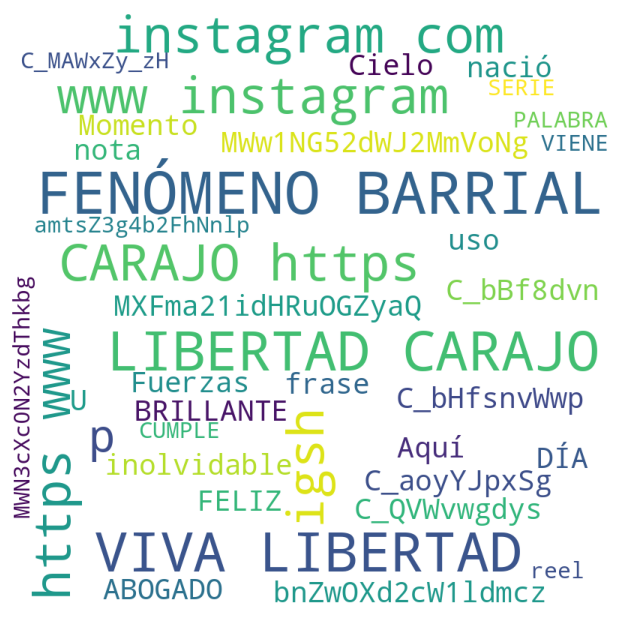

In [ ]:
# Filtrar el DataFrame para incluir solo tweets de JMilei que no sean retweets
df_jmilei = df_presi[(df_presi['JMilei'] == 0) & (df_presi['is-retweet'] == 1)]

# Unir todos los tweets en una sola cadena de texto
texto = " ".join(tweet for tweet in df_jmilei.text)

# Tokenización con NLTK
tokens = nltk.word_tokenize(texto)

# Get the Spanish stopwords
spanish_stopwords = stopwords.words('spanish')

# Filtrar stopwords
filtered_tokens = [token for token in tokens if token.lower() not in spanish_stopwords]

# Unir los tokens filtrados en una cadena
texto_filtrado = " ".join(filtered_tokens)

# Crear la nube de palabras con el texto filtrado
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = spanish_stopwords, # Use the Spanish stopwords
                min_font_size = 10).generate(texto_filtrado)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Nube @CFKArgentina** Palabras mas usadas por CFK

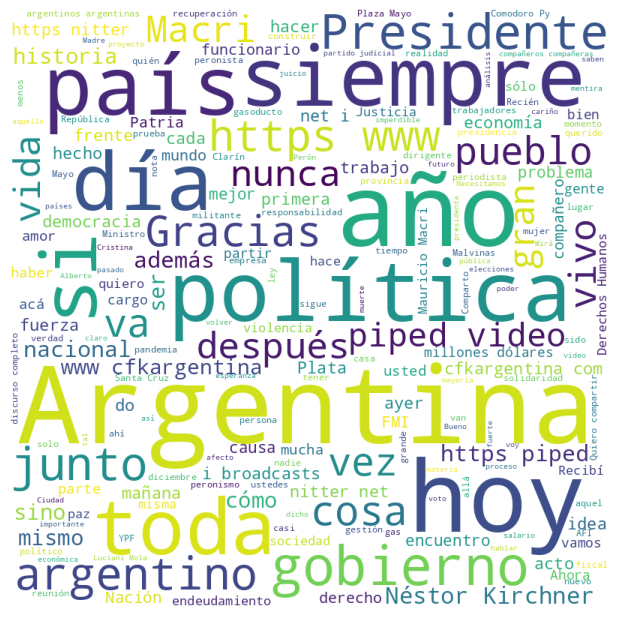

In [ ]:
# Filtrar el DataFrame para incluir solo tweets de CFKArgentina que no sean retweets
df_cfkargentina = df_presi[(df_presi['CFKArgentina'] == 0) & (df_presi['is-retweet'] == 1)]

# Unir todos los tweets en una sola cadena de texto
texto = " ".join(tweet for tweet in df_cfkargentina.text)

# Tokenización con NLTK
tokens = nltk.word_tokenize(texto)

# Get the Spanish stopwords
spanish_stopwords = stopwords.words('spanish')

# Filtrar stopwords
filtered_tokens = [token for token in tokens if token.lower() not in spanish_stopwords]

# Unir los tokens filtrados en una cadena
texto_filtrado = " ".join(filtered_tokens)

# Crear la nube de palabras con el texto filtrado
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = spanish_stopwords, # Use the Spanish stopwords
                min_font_size = 10).generate(texto_filtrado)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## **Matriz de Correlación**

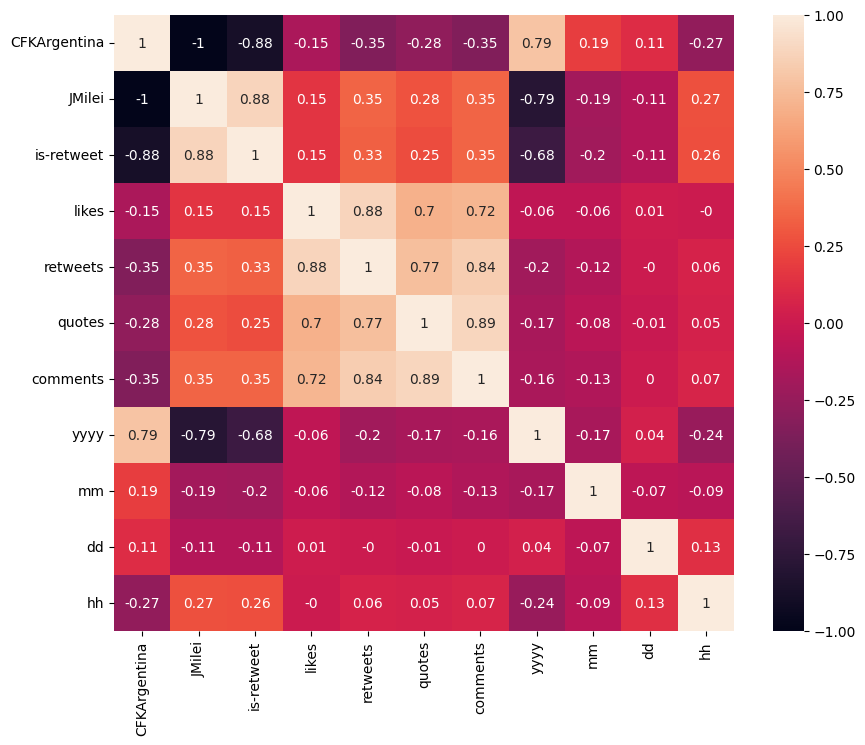

In [ ]:
columnas_numericas = df_presi.select_dtypes(include=['int64', 'float64','int32' ])
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(10,8))

sns.heatmap(matriz_corr, annot=True)
plt.show()

**Conteo de retweets**

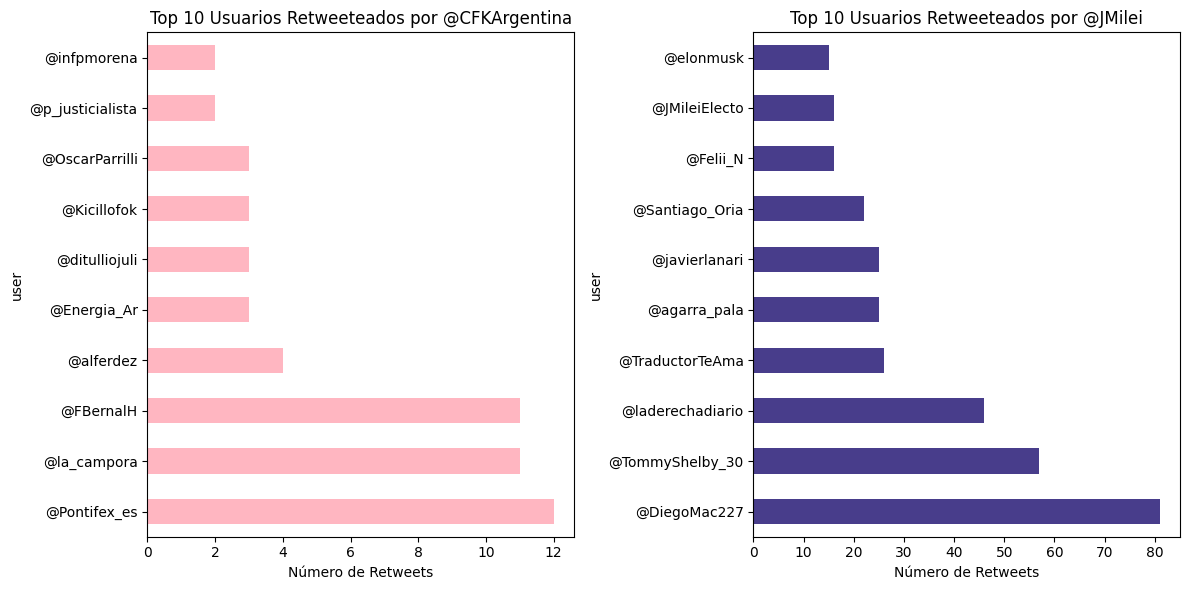

In [ ]:
df_cfkargentina = df_presi[(df_presi['CFKArgentina'] == 0) & (df_presi['is-retweet'] == 0)]
df_jmilei = df_presi[(df_presi['JMilei'] == 0) & (df_presi['is-retweet'] == 0)]

# Calcula el conteo de usuarios para cada DataFrame
conteo_usuarios_cfk = df_cfkargentina['user'].value_counts().head(10)
conteo_usuarios_jm = df_jmilei['user'].value_counts().head(10)

# Crea el subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para CFKArgentina
conteo_usuarios_cfk.plot(kind='barh', ax=axes[0], color='lightpink')
axes[0].set_title('Top 10 Usuarios Retweeteados por @CFKArgentina')
axes[0].set_xlabel('Número de Retweets')
axes[0].set_ylabel('user')

# Gráfico para JMilei
conteo_usuarios_jm.plot(kind='barh', ax=axes[1], color='darkslateblue')
axes[1].set_title('Top 10 Usuarios Retweeteados por @JMilei')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('user')

# Ajusta el espaciado entre subplots
plt.tight_layout()



# Muestra el gráfico
plt.show()

Insights

*   @JMilei tiene una mayor interaccion con sus seguidores y otrac cuentas.-

*  @CFKArgentina tiene casi un dobre de seguidores pero no logra una interacción con ellos.-

*   La palabra más destacada de @CFKArgentina es "ARGENTINA" mientras que la palabra más destacada de @JMilei es "LIBERTAD"

*   @JMilei se apoya en cuentas externas para fortalecer su cuenta propia.-





